In [1]:
import comet_ml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from comet_ml.query import Tag
from comet_ml.query import Parameter 
from comet_ml import API

# FFMPEG圧縮　Qscale


### top1 (FFMPEG圧縮　Qscale)

In [ ]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# models = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('q')  # x軸ラベル
ax.set_ylabel('top1')  # y軸ラベル
ax.set_title("val_top1_accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-12, 52)
ax.set_ylim(0, 100)
ffmpeg_list = []
ffmpeg_list.append(-10)
q_list = list(range(20, 55, 5))
# ffmpeg_list.append(q_list)
labels = ffmpeg_list + q_list
print(labels)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_top1_list = str(model) + '_top1_20_50_list = []' 
    exec(model_top1_list)
    for i in labels:
        # print(compression_rate)
        tagged = Tag("ver.10")
        q = Parameter('q')
        model_name = Parameter('model_name')
        query = ((q == i) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_20_50_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_20_50_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_20_50_list[j] = float(' + str(model) + '_top1_20_50_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_20_50_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(labels," + str(model) + "_top1_20_50_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/val_top1acc_20_50.pdf')
plt.show()

        

### top5 (FFMPEG圧縮　Qscale)

In [ ]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('q')  # x軸ラベル
ax.set_ylabel('top5')  # y軸ラベル
ax.set_title("val_top5_accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-12, 52)
ax.set_ylim(0, 100)
# labels = list(range(20, 55, 5))
ffmpeg_list = []
ffmpeg_list.append(-10)
q_list = list(range(20, 55, 5))
# ffmpeg_list.append(q_list)
labels = ffmpeg_list + q_list
print(labels)
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_top5_list = str(model) + '_top5_20_50_list = []' 
    exec(model_top5_list)
    top1_score_val = []
    for i in labels:
        # print(compression_rate)
        tagged = Tag("ver.10")
        q = Parameter('q')
        model_name = Parameter('model')
        query = ((q == i) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        model_top5_list_append = str(model) + '_top5_20_50_list.append(top5_score)' 
        exec(model_top5_list_append)

    model_top5_list_float_len = 'acc_len = len(' + str(model) + '_top5_20_50_list)' 
    exec(model_top5_list_float_len)
    for j in range(acc_len):
        model_top5_list_float = model + '_top5_20_50_list[j] = float(' + str(model) + '_top5_20_50_list[j])'
        exec(model_top5_list_float)
    top5acc_list_appen = 'top5acc_list.append(' + str(model) + '_top5_20_50_list)'
    exec(top5acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(labels," + str(model) + "_top5_20_50_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/val_top5acc_20_50.pdf')
plt.show()

        

In [ ]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# models = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax = fig.add_subplot()
ax.set_xlabel('q')  # x軸ラベル
ax.set_ylabel('top1')  # y軸ラベル
ax.set_title("val_top1_accuracy") # グラフタイトル
ax.grid()            # 罫線
ax1.set_xlim(-12, 0)
ax2.set_xlim(18, 52)
ax.set_ylim(0, 100)
# ffmpeg_list = []
# ffmpeg_list.append(-10)
# q_list = list(range(20, 55, 5))
# # ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
# print(labels)
# colors = ["red", "green", "blue", "black"]
labels = list(range(20, 55, 5))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    tagged = Tag("ver.10")
    q = Parameter('q')
    model_name = Parameter('model_name')
    query = ((q == -10) & (model_name == model) & tagged)
    experiments = api.query("ohtani", "ffmpeg", query)
    top1_list_val = experiments[0].get_metrics("validate_acc1")
    top1_score_val = top1_list_val[0].get("metricValue")
    top1_score_val = float(top1_score_val)
    for i in range(20, 55, 5):
        # print(compression_rate)
        tagged = Tag("ver.10")
        q = Parameter('q')
        model_name = Parameter('model_name')
        query = ((q == i) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = top1_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_20_50_list.append(top1_score)' 
        exec(model_top1_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_20_50_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = model + '_top1_20_50_list[j] = float(' + str(model) + '_top1_20_50_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_20_50_list)'
    exec(top1acc_list_appen)


    index = models.index(model)
    ax1.plot(-10, top1_score_val, '-o', color=colors[index], label=model)
    model_plt = "ax2.plot(labels," + str(model) + "_top1_20_50_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

d = 5
kwargs = dict(transform=ax.transAxes, color='k', lw=3, clip_on=False)
ax.plot((-d, +d), (0, 0), **kwargs)        
ax.plot((1 - d, 1 + d), (0, 0), **kwargs) 

ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/val_top1acc_20_50.pdf')
plt.show()

        

# gop, crf

### TOP1 (gop, crf)　横軸crf

[0, 10, 20, 30, 40, 50]
62.741448692152915


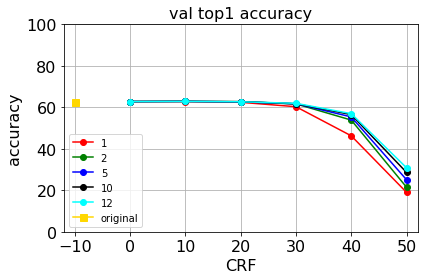

In [10]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []
gops = ["1", "2", "5", "10", "12"]

fig, ax = plt.subplots()
ax.set_xlabel('CRF')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-12, 52)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "gold"]

c = 0
for gop in gops:
    acc_len = 0
    # print(model)
    gop_top1_list = 'gop' + str(gop) + '_top1_0_50_list = []' 
    exec(gop_top1_list)
    for i in crf_list:
        # print(compression_rate)
        tagged = Tag("crf_g")
        crf_param = Parameter('crf')
        gop_param = Parameter('gop')
        model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "slow_r50") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = top1_list[0].get("metricValue")
        gop_top1_list_append = 'gop' + str(gop) + '_top1_0_50_list.append(top1_score)' 
        exec(gop_top1_list_append)

    gop_top1_list_float_len = 'acc_len = len(gop' + str(gop) + '_top1_0_50_list)' 
    exec(gop_top1_list_float_len)
    for j in range(acc_len):
        gop_top1_list_float = 'gop' + str(gop) + '_top1_0_50_list[j] = float(gop' + str(gop) + '_top1_0_50_list[j])'
        exec(gop_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(gop' + str(gop) + '_top1_0_50_list)'
    exec(top1acc_list_appen)


    index = gops.index(gop)
    c += 1
    gop_plt = "ax.plot(crf_list,gop" + str(gop) + "_top1_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)

query = ((gop_param == -10) & (crf_param == -10) & (model_name == "slow_r50") & tagged)
experiments = api.query("ohtani", "ffmpeg", query)
original_top1_list = experiments[0].get_metrics("validate_acc1")
original_top1_score = float(original_top1_list[0].get("metricValue"))
print(original_top1_score)
ax.plot(-10, original_top1_score,  marker='s', markersize=7, color=colors[c], label='original')

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/slow_r50/val_top1acc_0_50_in_original.pdf')
plt.show()

        

### TOP5 (gop, crf)　横軸crf

[0, 10, 20, 30, 40, 50]
82.81187122736418


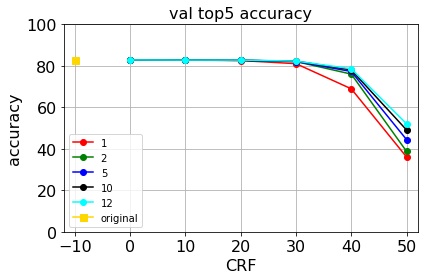

In [11]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []
gops = ["1", "2", "5", "10", "12"]

fig, ax = plt.subplots()
ax.set_xlabel('CRF')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-12, 52)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "gold"]
c = 0
for gop in gops:
    acc_len = 0
    # print(model)
    gop_top5_list = 'gop' + str(gop) + '_top5_0_50_list = []' 
    exec(gop_top5_list)
    for i in crf_list:
        # print(compression_rate)
        tagged = Tag("crf_g")
        crf_param = Parameter('crf')
        gop_param = Parameter('gop')
        model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "slow_r50") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        gop_top5_list_append = 'gop' + str(gop) + '_top5_0_50_list.append(top5_score)' 
        exec(gop_top5_list_append)

    gop_top5_list_float_len = 'acc_len = len(gop' + str(gop) + '_top5_0_50_list)' 
    exec(gop_top5_list_float_len)
    for j in range(acc_len):
        gop_top5_list_float = 'gop' + str(gop) + '_top5_0_50_list[j] = float(gop' + str(gop) + '_top5_0_50_list[j])'
        exec(gop_top5_list_float)
    top5acc_list_appen = 'top5acc_list.append(gop' + str(gop) + '_top5_0_50_list)'
    exec(top5acc_list_appen)


    index = gops.index(gop)
    c += 1
    gop_plt = "ax.plot(crf_list,gop" + str(gop) + "_top5_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)

query = ((gop_param == -10) & (crf_param == -10) & (model_name == "slow_r50") & tagged)
experiments = api.query("ohtani", "ffmpeg", query)
original_top1_list = experiments[0].get_metrics("validate_acc5")
original_top1_score = float(original_top1_list[0].get("metricValue"))
print(original_top1_score)
ax.plot(-10, original_top1_score,  marker='s', markersize=7, color=colors[c], label='original')

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,}
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/slow_r50/val_top5acc_0_50_in_original.pdf')
plt.show()

        

### TOP1 (gop, crf)　横軸g

[0, 10, 20, 30, 40, 50]
64.92957746478874


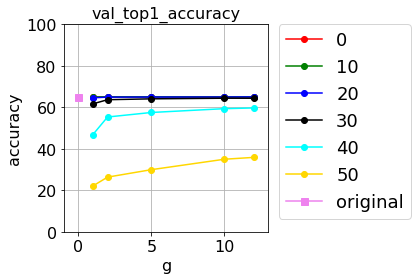

In [23]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []
gops = [1, 2, 5, 10, 12]
marker_list = ["o", "D", "h", "p", "*", "+"]

fig, ax = plt.subplots()
ax.set_xlabel('GOP')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-1, 13)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "gold", "violet"]

c = 0
for crf in crf_list:
    acc_len = 0
    # print(model)
    crf_top1_list = 'crf' + str(crf) + '_top1_0_50_list = []' 
    exec(crf_top1_list)
    for gop in gops:
        # print(compression_rate)
        tagged = Tag("crf_g")
        crf_param = Parameter('crf')
        gop_param = Parameter('gop')
        model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == crf) & (model_name == "x3d_m") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = float(top1_list[0].get("metricValue"))
        crf_top1_list_append = 'crf' + str(crf) + '_top1_0_50_list.append(top1_score)' 
        exec(crf_top1_list_append)

    # crf_top1_list_float_len = 'acc_len = len(crf' + str(crf) + '_top1_0_50_list)' 
    # exec(crf_top1_list_float_len)
    # for j in range(acc_len):
    #     crf_top1_list_float = 'crf' + str(crf) + '_top1_0_50_list[j] = float(crf' + str(crf) + '_top1_0_50_list[j])'
    #     exec(crf_top1_list_float)
    # top1acc_list_appen = 'top1acc_list.append(crf' + str(crf) + '_top1_0_50_list)'
    # exec(top1acc_list_appen)


    index = crf_list.index(crf)
    c += 1
    crf_plt = "ax.plot(gops,crf" + str(crf) + "_top1_0_50_list, '-o', color=colors[index], label=crf)"
    exec(crf_plt)

query = ((gop_param == -10) & (crf_param == -10) & (model_name == "x3d_m") & tagged)
experiments = api.query("ohtani", "ffmpeg", query)
original_top1_list = experiments[0].get_metrics("validate_acc1")
original_top1_score = float(original_top1_list[0].get("metricValue"))
print(original_top1_score)
ax.plot(0, original_top1_score,  marker='s', markersize=7, color=colors[c], label='original')

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
# ax.legend(loc=0) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/x3d_m/val_top1acc_0_50_crf.pdf')
plt.show()

        

# crf, g 横軸ビットレート（対数表示）

### TOP1 (crf, g 横軸ビットレート（対数表示）)

[0, 10, 20, 30, 40, 50]


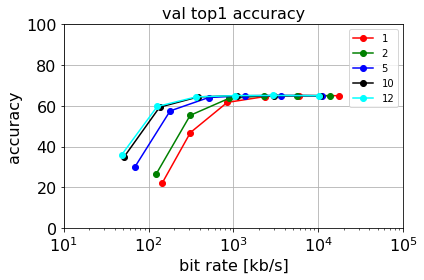

In [13]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []
gops = ["1", "2", "5", "10", "12"]

# kbps
bit_rate_g1 = [17405.166927008402, 5930.9245957543135, 2373.075034911213, 844.4732482016199, 310.7069560340057, 144.68931445243726]
bit_rate_g2 = [13621.154783892549, 5655.389589063836, 2317.9575777453592, 884.6297558227275, 308.9010592082097, 122.20564097791639]
bit_rate_g5 = [11183.482682831129, 3585.8131812465413, 1375.3337290105135, 510.6622024246692,179.37209894863926, 68.81202726495296]
bit_rate_g10 = [10369.135582574576, 3006.101234870969, 1086.8884072136425, 384.69858619648875, 134.8646993812566, 51.53232174656672]
bit_rate_g12 = [10266.373229589013, 2904.1925922833143, 1036.4119015544043, 362.24532340661, 126.51346134111374, 47.99429770109161]

fig, ax = plt.subplots()
ax.set_xlabel('bit rate [kb/s]')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(10, 10**5)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for gop in gops:
    acc_len = 0
    # print(model)
    gop_top1_list = 'gop' + str(gop) + '_top1_0_50_list = []' 
    exec(gop_top1_list)
    for i in crf_list:
        # print(compression_rate)
        tagged = Tag("crf_g")
        crf_param = Parameter('crf')
        gop_param = Parameter('gop')
        model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "x3d_m") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = top1_list[0].get("metricValue")
        gop_top1_list_append = 'gop' + str(gop) + '_top1_0_50_list.append(top1_score)' 
        exec(gop_top1_list_append)

    gop_top1_list_float_len = 'acc_len = len(gop' + str(gop) + '_top1_0_50_list)' 
    exec(gop_top1_list_float_len)
    for j in range(acc_len):
        gop_top1_list_float = 'gop' + str(gop) + '_top1_0_50_list[j] = float(gop' + str(gop) + '_top1_0_50_list[j])'
        exec(gop_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(gop' + str(gop) + '_top1_0_50_list)'
    exec(top1acc_list_appen)


    index = gops.index(gop)
    gop_plt = "ax.plot(bit_rate_g" + str(gop) + ",gop" + str(gop) + "_top1_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
plt.xscale("log")
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/val_top1acc_0_50_bitrate.pdf')
# plt.savefig('val_top1acc_0_50.pdf')
plt.show()

        

### TOP5 (crf, g 横軸ビットレート（対数表示）)

[0, 10, 20, 30, 40, 50]


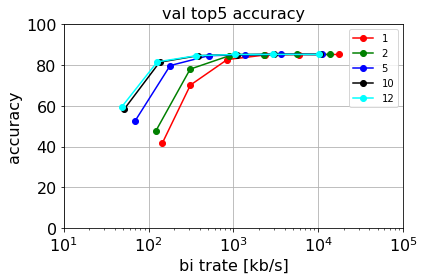

In [14]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []
gops = ["1", "2", "5", "10", "12"]

bit_rate_g1 = [17405.166927008402, 5930.9245957543135, 2373.075034911213, 844.4732482016199, 310.7069560340057, 144.68931445243726]
bit_rate_g2 = [13621.154783892549, 5655.389589063836, 2317.9575777453592, 884.6297558227275, 308.9010592082097, 122.20564097791639]
bit_rate_g5 = [11183.482682831129, 3585.8131812465413, 1375.3337290105135, 510.6622024246692,179.37209894863926, 68.81202726495296]
bit_rate_g10 = [10369.135582574576, 3006.101234870969, 1086.8884072136425, 384.69858619648875, 134.8646993812566, 51.53232174656672]
bit_rate_g12 = [10266.373229589013, 2904.1925922833143, 1036.4119015544043, 362.24532340661, 126.51346134111374, 47.99429770109161]

fig, ax = plt.subplots()
ax.set_xlabel('bi trate [kb/s]')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(10, 10**5)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for gop in gops:
    acc_len = 0
    # print(model)
    gop_top5_list = 'gop' + str(gop) + '_top5_0_50_list = []' 
    exec(gop_top5_list)
    for i in crf_list:
        # print(compression_rate)
        tagged = Tag("crf_g")
        crf_param = Parameter('crf')
        gop_param = Parameter('gop')
        model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "x3d_m") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        gop_top5_list_append = 'gop' + str(gop) + '_top5_0_50_list.append(top5_score)' 
        exec(gop_top5_list_append)

    gop_top5_list_float_len = 'acc_len = len(gop' + str(gop) + '_top5_0_50_list)' 
    exec(gop_top5_list_float_len)
    for j in range(acc_len):
        gop_top5_list_float = 'gop' + str(gop) + '_top5_0_50_list[j] = float(gop' + str(gop) + '_top5_0_50_list[j])'
        exec(gop_top5_list_float)
    top5acc_list_appen = 'top5acc_list.append(gop' + str(gop) + '_top5_0_50_list)'
    exec(top5acc_list_appen)


    index = gops.index(gop)
    gop_plt = "ax.plot(bit_rate_g" + str(gop) + ",gop" + str(gop) + "_top5_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)


parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
plt.xscale("log")
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/val_top5acc_0_50_bitrate.pdf')
# plt.savefig('val_top5acc_0_50.pdf')
plt.show()

        

## 元動画追加

### TOP1 (元動画追加[ビットレート])

[0, 10, 20, 30, 40, 50]
62.741448692152915


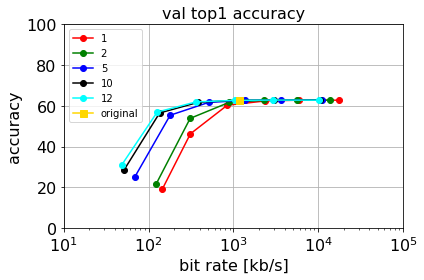

In [8]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []
gops = ["1", "2", "5", "10", "12"]

bit_rate_g1 = [17405.166927008402, 5930.9245957543135, 2373.075034911213, 844.4732482016199, 310.7069560340057, 144.68931445243726]
bit_rate_g2 = [13621.154783892549, 5655.389589063836, 2317.9575777453592, 884.6297558227275, 308.9010592082097, 122.20564097791639]
bit_rate_g5 = [11183.482682831129, 3585.8131812465413, 1375.3337290105135, 510.6622024246692,179.37209894863926, 68.81202726495296]
bit_rate_g10 = [10369.135582574576, 3006.101234870969, 1086.8884072136425, 384.69858619648875, 134.8646993812566, 51.53232174656672]
bit_rate_g12 = [10266.373229589013, 2904.1925922833143, 1036.4119015544043, 362.24532340661, 126.51346134111374, 47.99429770109161]

fig, ax = plt.subplots()
ax.set_xlabel('bit rate [kb/s]')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(10, 10**5)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "gold"]

c = 0
tagged = Tag("crf_g")
crf_param = Parameter('crf')
gop_param = Parameter('gop')
model_name = Parameter('model')
for gop in gops:
    acc_len = 0
    # print(model)
    gop_top1_list = 'gop' + str(gop) + '_top1_0_50_list = []' 
    exec(gop_top1_list)
    for i in crf_list:
        # print(compression_rate)
        # tagged = Tag("crf_g")
        # crf_param = Parameter('crf')
        # gop_param = Parameter('gop')
        # model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "slow_r50") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        top1_score = top1_list[0].get("metricValue")
        gop_top1_list_append = 'gop' + str(gop) + '_top1_0_50_list.append(top1_score)' 
        exec(gop_top1_list_append)

    gop_top1_list_float_len = 'acc_len = len(gop' + str(gop) + '_top1_0_50_list)' 
    exec(gop_top1_list_float_len)
    for j in range(acc_len):
        gop_top1_list_float = 'gop' + str(gop) + '_top1_0_50_list[j] = float(gop' + str(gop) + '_top1_0_50_list[j])'
        exec(gop_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(gop' + str(gop) + '_top1_0_50_list)'
    exec(top1acc_list_appen)


    index = gops.index(gop)
    c += 1
    gop_plt = "ax.plot(bit_rate_g" + str(gop) + ",gop" + str(gop) + "_top1_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)

query = ((gop_param == -10) & (crf_param == -10) & (model_name == "slow_r50") & tagged)
experiments = api.query("ohtani", "ffmpeg", query)
original_top1_list = experiments[0].get_metrics("validate_acc1")
original_top1_score = float(original_top1_list[0].get("metricValue"))
print(original_top1_score)
ax.plot(1159.0590403984506, original_top1_score,  marker='s', markersize=7, color=colors[c], label='original')
parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
plt.xscale("log")
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/slow_r50/val_top1acc_bitrate_in_original.pdf')
# plt.savefig('val_top1acc_0_50.pdf')
plt.show()

        

### TOP5　(元動画追加[ビットレート])

[0, 10, 20, 30, 40, 50]
82.81187122736418


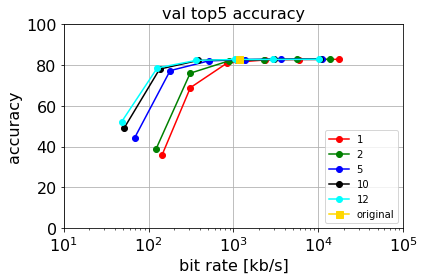

In [9]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
# gops = ["slowfast_r50", "x3d_m", "x3d_xs", "slow_r50"]
# models = ["slowfast_r50", "slowfast_r101", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []
gops = ["1", "2", "5", "10", "12"]

bit_rate_g1 = [17405.166927008402, 5930.9245957543135, 2373.075034911213, 844.4732482016199, 310.7069560340057, 144.68931445243726]
bit_rate_g2 = [13621.154783892549, 5655.389589063836, 2317.9575777453592, 884.6297558227275, 308.9010592082097, 122.20564097791639]
bit_rate_g5 = [11183.482682831129, 3585.8131812465413, 1375.3337290105135, 510.6622024246692,179.37209894863926, 68.81202726495296]
bit_rate_g10 = [10369.135582574576, 3006.101234870969, 1086.8884072136425, 384.69858619648875, 134.8646993812566, 51.53232174656672]
bit_rate_g12 = [10266.373229589013, 2904.1925922833143, 1036.4119015544043, 362.24532340661, 126.51346134111374, 47.99429770109161]

fig, ax = plt.subplots()
ax.set_xlabel('bit rate [kb/s]')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(10, 10**5)
ax.set_ylim(0, 100)
crf_list = list(range(0, 55, 10))
# ffmpeg_list.append(q_list)
# labels = ffmpeg_list + q_list
print(crf_list)
# colors = ["red", "green", "blue", "black"]
colors = ["red", "green", "blue", "black" , "cyan" , "gold"]

c = 0
tagged = Tag("crf_g")
crf_param = Parameter('crf')
gop_param = Parameter('gop')
model_name = Parameter('model')
for gop in gops:
    acc_len = 0
    # print(model)
    gop_top5_list = 'gop' + str(gop) + '_top5_0_50_list = []' 
    exec(gop_top5_list)
    for i in crf_list:
        # print(compression_rate)
        # tagged = Tag("crf_g")
        # crf_param = Parameter('crf')
        # gop_param = Parameter('gop')
        # model_name = Parameter('model')
        query = ((gop_param == gop) & (crf_param == i) & (model_name == "slow_r50") & tagged)
        experiments = api.query("ohtani", "ffmpeg", query)
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        gop_top5_list_append = 'gop' + str(gop) + '_top5_0_50_list.append(top5_score)' 
        exec(gop_top5_list_append)

    gop_top5_list_float_len = 'acc_len = len(gop' + str(gop) + '_top5_0_50_list)' 
    exec(gop_top5_list_float_len)
    for j in range(acc_len):
        gop_top5_list_float = 'gop' + str(gop) + '_top5_0_50_list[j] = float(gop' + str(gop) + '_top5_0_50_list[j])'
        exec(gop_top5_list_float)
    top5acc_list_appen = 'top5acc_list.append(gop' + str(gop) + '_top5_0_50_list)'
    exec(top5acc_list_appen)


    index = gops.index(gop)
    c += 1
    gop_plt = "ax.plot(bit_rate_g" + str(gop) + ",gop" + str(gop) + "_top5_0_50_list, '-o', color=colors[index], label=gop)"
    exec(gop_plt)

query = ((gop_param == -10) & (crf_param == -10) & (model_name == "slow_r50") & tagged)
experiments = api.query("ohtani", "ffmpeg", query)
original_top5_list = experiments[0].get_metrics("validate_acc5")
original_top5_score = float(original_top5_list[0].get("metricValue"))
print(original_top5_score)
ax.plot(1159.0590403984506, original_top5_score,  marker='s', markersize=7, color=colors[c], label='original')
parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
        # 'figure.figsize': (8,6)
plt.rcParams.update(parameters) 
plt.xscale("log")
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/ffmpeg/slow_r50/val_top5acc_bitrate_in_original.pdf')
# plt.savefig('val_top5acc_0_50.pdf')
plt.show()

        